In [42]:
import cv2
import importlib
main = importlib.import_module('main')

In [39]:
main = importlib.reload(main)

This is a naive python implementation of Aggregated Channel Feature classifier. For simplicity, it does not follow all the advanced detals in the literature and the speed of detection is extremely slow. Therefore, it is only for education purpose and not suitable for any comercial use. The missing features including: 

1. Fast pyramid feature algorithm is not implemented, the detection is very slow
2. Multiple-class detection have not been implemented, one-class detection only
3. The max/min size of detecting sliding window is 80 x 80/16 x 16, if the object size out of the limit, can not be detected

The source code of this version is very simple and straigt-forward. Anyone who interested in working on those features are welcome to submit their pull requests. 

The data folder should contain two subfolders named "positives" and "negatives", and one annotation file named "label.csv". The positive subfolder includes images with the face in picture, and negative subfolder includes only the images that has no human face, mostly nature landscape. The label csv file have coordinates of bounding boxes in positive images. Prepare all these data in one folder, for example, 'data' and run the following command to get the input data:

In [35]:
positive_array, negative_array = main.preprocess(folder='data')

Check the shape of positive and negetive data. In our example dataset, we labelled 76 positive patches, and we also prepared 350 negative patches. Therefore, the shape of positive_array should be 76 x 80 x 80 x 3 and the negative_array should be 350 x 80 x 80 x 3

In [36]:
positive_array.shape

(76, 80, 80, 3)

In [37]:
negative_array.shape

(350, 80, 80, 3)

We use the train() funciton to train a soft casacaded adaboost classifier. After training, the model parameters are stored in the address 'model/weights.pkl' by default

In [40]:
main.train(positive_array, negative_array)

----------
input shape:  (426, 4000) label shape: (426,)
train the  0  classifier...
done.
----------
input shape:  (426, 4000) label shape: (426,)
train the  1  classifier...
done.
----------
input shape:  (426, 4000) label shape: (426,)
train the  2  classifier...
done.
----------
input shape:  (426, 4000) label shape: (426,)
train the  3  classifier...
done.
----------
optimize the thresholds for stages...
try combinations: 120
find best thresholds: (0.0, 0.0, 0.0)
done.
----------
save the model...
done.


The detect() function will load the pre-trained AdaBoost classifier and use a sliding window with 80 x 80 size to find candidate face patches, and eventually use NMS to pick the most possible bounding box. Since this implementation is a naive version, the detecting speed is very slow. After about 20 asterisks displayed, the detection will be finished.

In [45]:
img = cv2.imread('data/face_test.jpeg')

bboxes = main.detect(img, fix_window_51=True)

image size: (280, 640, 3)
window size: 51
*****Find candidates: 1366
run NMS...
final result:  31


Display our results

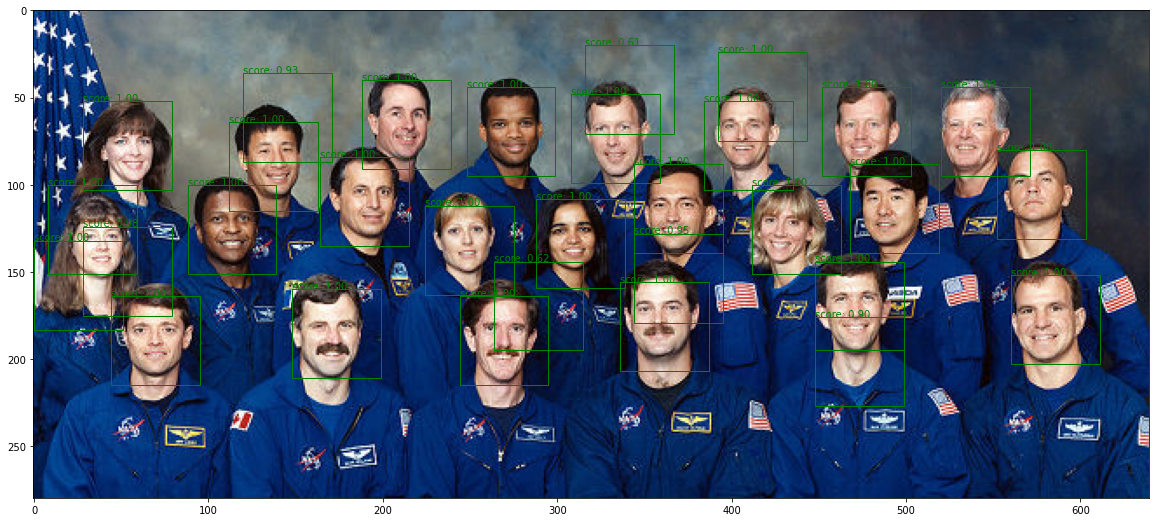

In [46]:
main.display(bboxes, img)